In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
# Define the transformations to apply to the images
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
img_size=227
Batch_size=64
# Load the dataset and split it into training and test sets
data_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/White Background/Photos Capstone',
    target_size=(img_size, img_size),
    batch_size=Batch_size,
    class_mode='categorical'
)

# Initialize empty arrays to hold the images and labels
X = np.empty((0, img_size, img_size, 3))
y = np.empty((0, 6))

# Iterate over the entire dataset
for x, label in data_generator:
    # Concatenate the images and labels to the arrays
    X = np.concatenate((X, x))
    y = np.concatenate((y, label))
    # Break the loop when all images have been processed
    if len(X) == data_generator.n:
        break
        
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Found 5209 images belonging to 6 classes.


In [ ]:
# Define the AlexNet model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(img_size,img_size,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')
])

# Compile the model with the loss function and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=Batch_size, validation_data=(X_test, y_test))


Epoch 1/10
66/66 [==============================] - 14s 47ms/step - loss: 6.6750 - accuracy: 0.5654 - val_loss: 39.9434 - val_accuracy: 0.1536
Epoch 2/10
66/66 [==============================] - 2s 28ms/step - loss: 0.7501 - accuracy: 0.7780 - val_loss: 5.7169 - val_accuracy: 0.3464
Epoch 3/10
66/66 [==============================] - 2s 28ms/step - loss: 0.5276 - accuracy: 0.8464 - val_loss: 5.3760 - val_accuracy: 0.2917
Epoch 4/10
66/66 [==============================] - 2s 28ms/step - loss: 0.4755 - accuracy: 0.8719 - val_loss: 2.4100 - val_accuracy: 0.5768
Epoch 5/10
66/66 [==============================] - 2s 29ms/step - loss: 0.4096 - accuracy: 0.8918 - val_loss: 4.8914 - val_accuracy: 0.5192
Epoch 6/10
66/66 [==============================] - 2s 28ms/step - loss: 0.4279 - accuracy: 0.8992 - val_loss: 1.8026 - val_accuracy: 0.6046
Epoch 7/10
66/66 [==============================] - 2s 28ms/step - loss: 0.4131 - accuracy: 0.9021 - val_loss: 1.0737 - val_accuracy: 0.7486
Epoch 8/10


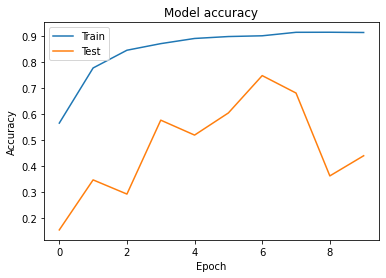

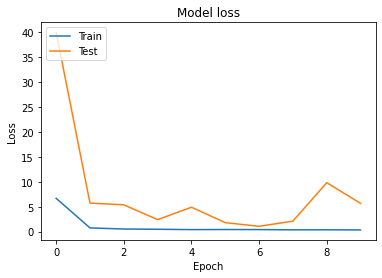

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Models/alexNet_white_10_epoch.h5') 

In [ ]:
# from keras.models import load_model
# model = load_model('/content/drive/MyDrive/Models/alexNet_white_10_epoch.h5')

In [ ]:
import pathlib
class_names = (data_generator.class_indices)
class_names = list((k) for k,v in class_names.items())
img = pathlib.Path('/content/drive/MyDrive/Testing/Chipa Guazu/20220718013716042.jpg') 

img = tf.keras.utils.load_img(
    img, target_size=(img_size, img_size)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# # print(
# #     "This image most likely belongs to {} with a {:.2f} percent confidence."
# #     .format(class_names[np.argmax(score)], predictions[0])
# # )
# # print(class_names[np.argmax(score)], predictions[0])
# print('Name: ', class_names[np.argmax(score)], 'Conf: ', np.argmax(predictions[0]))
score_index = tf.argmax(predictions[0])
score =  predictions[0, score_index]
print('Class : ' , class_names[score_index], 'Conf: ', score)

1/1 [==============================] - 0s 20ms/step
Class :  Pajagua Conf:  1.0
